<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center>
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center>
    <font size="4">Computer Vision 1 University of Amsterdam</font>
</center>
<center>
    <font size="4">Due 23:59PM, 24th October, 2025 (Amsterdam time)</font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID: 11977477 \
Student1 Name: Cinthya Criollo

Student2 ID: 15189155\
Student2 Name: Hana Derkova

Student3 ID: Finley Helms \
Student3 Name: 14624257

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification.

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves).

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split
import os, csv, datetime
from pathlib import Path

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

In [4]:
# YOUR CODE HERE

import os, math, random
from pathlib import Path
import matplotlib.pyplot as plt
import torch

# 1) Build an index of dataset positions per class id (fast sampling later)
def build_class_index_map(dataset):
    by_cls = {}
    # torchvision CIFAR100 returns (img, target) with .targets list
    for idx, y in enumerate(dataset.targets):
        by_cls.setdefault(y, []).append(idx)
    return by_cls

# 2) Un-normalize tensor image that was normalized with mean/std=(0.5,0.5,0.5)
def unnormalize(img_t):
    # img_t: CxHxW in [-1,1] because of Normalize((.5,.5,.5), (.5,.5,.5))
    return img_t.mul(0.5).add(0.5).clamp(0, 1)

# 3) Sample k images (as tensors) from a subclass name
def sample_images_for_class(dataset, class_name, class_to_idx, index_map, k=5, seed=0):
    rnd = random.Random(seed)
    cls_id = class_to_idx[class_name]
    pool = index_map[cls_id]
    idxs = pool if len(pool) <= k else rnd.sample(pool, k)
    imgs = []
    for i in idxs:
        img_t, _ = dataset[i]  # already transformed (normalized tensor)
        imgs.append(unnormalize(img_t).permute(1, 2, 0))  # HxWxC in [0,1]
    return imgs

# 4) One figure per superclass: rows=subclasses, cols=samples_per_class
def visualize_superclasses_grid(
    dataset,
    superclasses_dict,
    class_to_idx,
    samples_per_class=5,
    out_dir="figures_cifar100_superclasses",
    dpi=160,
    seed=0,
    show=False
):
    Path(out_dir).mkdir(parents=True, exist_ok=True)
    index_map = build_class_index_map(dataset)
    saved_paths = []

    for sup, subs in superclasses_dict.items():
        rows = len(subs)
        cols = samples_per_class
        fig_h = max(2.5, 0.9 * rows)    # scale gently with rows
        fig_w = max(4.5, 1.2 * cols)    # scale gently with cols
        fig, axes = plt.subplots(rows, cols, figsize=(fig_w, fig_h), squeeze=False)
        fig.suptitle(f"{sup}", fontsize=12, y=0.995)

        for r, sub in enumerate(subs):
            imgs = sample_images_for_class(dataset, sub, class_to_idx, index_map,
                                           k=samples_per_class, seed=seed+hash(sub)%10000)
            for c in range(cols):
                ax = axes[r][c]
                ax.axis("off")
                if c < len(imgs):
                    ax.imshow(imgs[c].cpu())
                if c == 0:
                    ax.set_title(sub.replace('_',' '), fontsize=9, loc='left', pad=2)

        fig.tight_layout(rect=[0, 0, 1, 0.97])
        out_path = os.path.join(out_dir, f"{sup.replace(' ','_')}.png")
        fig.savefig(out_path, dpi=dpi, bbox_inches="tight")
        if show:
            plt.show()
        plt.close(fig)
        saved_paths.append(out_path)

    print(f"Saved {len(saved_paths)} figures to: {os.path.abspath(out_dir)}")
    return saved_paths

# 5) Single 10x10 montage of ALL 100 classes (1 sample per class)
def visualize_all_classes_montage(
    dataset,
    classes_list,
    class_to_idx,
    out_path="figures_cifar100_superclasses/cifar100_10x10_montage.png",
    grid_rows=10,
    grid_cols=10,
    dpi=200,
    seed=123
):
    assert len(classes_list) == grid_rows * grid_cols, "Need 100 classes for a 10x10 grid."
    Path(os.path.dirname(out_path)).mkdir(parents=True, exist_ok=True)
    index_map = build_class_index_map(dataset)
    rnd = random.Random(seed)

    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(12, 12))
    for i, cls_name in enumerate(classes_list):
        r, c = divmod(i, grid_cols)
        ax = axes[r][c]
        ax.axis("off")
        cls_id = class_to_idx[cls_name]
        pool = index_map[cls_id]
        idx = rnd.choice(pool)
        img_t, _ = dataset[idx]
        img = unnormalize(img_t).permute(1, 2, 0)  # HxWxC
        ax.imshow(img.cpu())
        ax.set_title(cls_name.replace('_',' '), fontsize=7, pad=1)

    fig.tight_layout(pad=0.5)
    fig.savefig(out_path, dpi=dpi, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved montage to: {os.path.abspath(out_path)}")
    return out_path


# (A) One figure per superclass with 4 examples per subclass:
_ = visualize_superclasses_grid(
    dataset=train_set,                         # or test_set
    superclasses_dict=superclasses,
    class_to_idx=class_to_idx,
    samples_per_class=4,
    out_dir="figures_cifar100_superclasses",
    dpi=160,
    seed=0,
    show=False
)

# (B) A single 10x10 montage (one sample per fine class):
_ = visualize_all_classes_montage(
    dataset=train_set,
    classes_list=list(classes),               # tuple -> list
    class_to_idx=class_to_idx,
    out_path="figures_cifar100_superclasses/cifar100_10x10_montage.png",
    grid_rows=10, grid_cols=10, dpi=200, seed=123
)

print("All visualization figures are ready. Add them to your appendix and cite them in your report.")


Saved 20 figures to: /content/cv1-final-lab-part-2/figures_cifar100_superclasses
Saved montage to: /content/cv1-final-lab-part-2/figures_cifar100_superclasses/cifar100_10x10_montage.png
All visualization figures are ready. Add them to your appendix and cite them in your report.


<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes.

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [5]:

class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        # YOUR CODE HERE
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''


        # YOUR CODE HERE

        # Flatten input: (N, 3, 32, 32) -> (N, 3072)
        x = x.view(x.size(0), -1)

        # First layer + ReLU activation
        x = F.relu(self.fc1(x))

        # Output layer (no activation, scores only)
        x = self.fc2(x)

        return x


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [6]:
class ConvNet(nn.Module):

    def __init__(self):
        '''
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        # YOUR CODE HERE
        super(ConvNet, self).__init__()
        # C1: RGB → 6 maps, kernel 5x5 (LeNet uses 5x5; RGB handled via in_channels=3)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)   # 32→28
        self.pool  = nn.AvgPool2d(kernel_size=2, stride=2)                                          # 28→14, 10→5
        # C3
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)                           # 14→10
        # C5 (acts fully connected over 5×5 to 1×1)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)                         # 5→1
        # F6 and output
        self.fc1   = nn.Linear(120, 84)     # F6
        self.fc2   = nn.Linear(84, 100)     # CIFAR-100 classes

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE

        x = F.relu(self.conv1(x))           # (N, 6, 28, 28)
        x = self.pool(x)                    # (N, 6, 14, 14)
        x = F.relu(self.conv2(x))           # (N, 16, 10, 10)
        x = self.pool(x)                    # (N, 16, 5, 5)
        x = F.relu(self.conv3(x))           # (N, 120, 1, 1)
        x = x.view(x.size(0), -1)           # (N, 120)
        x = F.relu(self.fc1(x))             # (N, 84)
        x = self.fc2(x)                     # (N, 100) logits
        return x


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [7]:
class CIFAR100_loader(Dataset):

    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''

        # YOUR CODE HERE
        self.dataset = torchvision.datasets.CIFAR100(
            root=root,
            train=train,
            transform=None,
            download=download
        )
        self.transform = transform

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        # YOUR CODE HERE
        return len(self.dataset)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        # YOUR CODE HERE

        image, label = self.dataset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [8]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    # YOUR CODE HERE
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    return train_transform, test_transform

In [9]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return optimizer



<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [10]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [11]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [12]:
def train(net, train_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # YOUR CODE HERE


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    # Get already-defined globals (you mentioned these exist)
    g = globals()
    val_loader = g.get("val_loader", g.get("test_loader", None))
    validate_fn = g.get("validate", None)
    validate_per_class_fn = g.get("validate_per_class", None)
    classes = g.get("classes", None)

    # Prepare checkpoint paths
    save_dir = os.path.join(os.path.expanduser("~"), "cv1", "outputs")
    os.makedirs(save_dir, exist_ok=True)
    best_ckpt_path = os.path.join(save_dir, "best_model.pt")
    last_ckpt_path = os.path.join(save_dir, "last_model.pt")

    print("CWD:", os.getcwd())
    print("Device:", device)
    print("Will save BEST to:", os.path.abspath(best_ckpt_path))
    print("Will save LAST to:", os.path.abspath(last_ckpt_path))

    best_val_acc = -1.0  # ensures first epoch saves
    print_every = 100

    for epoch in range(1, epochs + 1):
        net.train()
        running_loss, correct, total = 0.0, 0, 0

        for step, (inputs, labels) in enumerate(train_loader, 1):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad(set_to_none=True)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

            if step % print_every == 0:
                now = datetime.datetime.now().strftime("%H:%M:%S")
                print(f"[{now}] epoch {epoch:02d} step {step}/{len(train_loader)} loss={loss.item():.4f}")

        avg_loss = running_loss / max(total, 1)
        train_acc = 100.0 * correct / max(total, 1)
        msg = f"Epoch [{epoch}/{epochs}]  loss: {avg_loss:.4f}  train_acc: {train_acc:.2f}%"

        # ---- validation ----
        val_acc = None
        if val_loader is not None and callable(validate_fn):
            val_acc = validate_fn(net, val_loader)  # uses your defined validate()

            # optional per-class
            if callable(validate_per_class_fn) and classes is not None:
                validate_per_class_fn(net, val_loader, classes)

            # save best
            if epoch == 1 or val_acc >= best_val_acc:
                best_val_acc = val_acc
                torch.save(net.state_dict(), best_ckpt_path)
                print(f"Checkpoint saved: {best_ckpt_path}")

            msg += f"  val_acc: {val_acc:.2f}%  best_val: {best_val_acc:.2f}%"
        else:
            msg += "  (no validation)"

        print(msg)

    # ---- save last checkpoint ----
    torch.save(net.state_dict(), last_ckpt_path)
    print(f"Saved LAST to: {os.path.abspath(last_ckpt_path)}")
    if best_val_acc >= 0:
        print(f"BEST validation accuracy: {best_val_acc:.2f}%")


First, initialize the datasets and data loaders for both models.

In [13]:
# YOUR CODE HERE

# Make transforms
train_tf, test_tf = create_transforms()

# Pin memory flag
pin = torch.cuda.is_available()

# Load full training set
train_full = CIFAR100_loader("./data", train=True, transform=train_tf, download=True)

# Split into train/validation subsets
train_size = int(0.9 * len(train_full))
val_size = len(train_full) - train_size
train_idx, val_idx = torch.utils.data.random_split(range(len(train_full)), [train_size, val_size])

train_base = CIFAR100_loader("./data", train=True, transform=None, download=True)
val_base = CIFAR100_loader("./data", train=True, transform=None, download=False)
test_ds = CIFAR100_loader("./data", train=False, transform=None, download=False)

train_ds = torch.utils.data.Subset(train_base, train_idx.indices if hasattr(train_idx,'indices') else train_idx)
val_ds = torch.utils.data.Subset(val_base, val_idx.indices if hasattr(val_idx,'indices') else val_idx)

train_ds.dataset.transform = train_tf
val_ds.dataset.transform = test_tf
test_ds.transform = test_tf

# Dataloaders
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,  num_workers=2, pin_memory=pin)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False, num_workers=2, pin_memory=pin)

# Test dataset (official test split)
test_ds = CIFAR100_loader("./data", train=False, transform=test_tf, download=True)
test_loader = DataLoader(test_ds, batch_size=256, shuffle=False, num_workers=2, pin_memory=pin)


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
# YOUR CODE HERE

# TwoLayerNet
twolayer = TwoLayerNet(input_size=3*32*32, hidden_size=512, num_classes=100)
criterion = nn.CrossEntropyLoss()
opt1 = create_optimizer(twolayer, learning_rate=1e-3)

train(twolayer, train_loader, criterion, opt1, epochs=20)
validate(twolayer, val_loader)
validate_per_class(twolayer, val_loader, classes)


CWD: /content/cv1-final-lab-part-2
Device: cuda
Will save BEST to: /root/cv1/outputs/best_model.pt
Will save LAST to: /root/cv1/outputs/last_model.pt
[15:03:19] epoch 01 step 100/352 loss=3.9738
[15:03:24] epoch 01 step 200/352 loss=3.7641
[15:03:28] epoch 01 step 300/352 loss=4.0480
Accuracy of the network on the test images: 13.54 %
Accuracy of apple : 28.57 %
Accuracy of aquarium_fish : 32.20 %
Accuracy of baby  : 0.00 %
Accuracy of bear  : 0.00 %
Accuracy of beaver : 0.00 %
Accuracy of bed   : 1.56 %
Accuracy of bee   : 32.50 %
Accuracy of beetle : 4.35 %
Accuracy of bicycle : 8.93 %
Accuracy of bottle : 15.22 %
Accuracy of bowl  : 4.88 %
Accuracy of boy   : 0.00 %
Accuracy of bridge : 9.30 %
Accuracy of bus   : 8.00 %
Accuracy of butterfly : 12.96 %
Accuracy of camel : 1.69 %
Accuracy of can   : 14.58 %
Accuracy of castle : 27.12 %
Accuracy of caterpillar : 11.43 %
Accuracy of cattle : 3.70 %
Accuracy of chair : 30.23 %
Accuracy of chimpanzee : 38.71 %
Accuracy of clock : 9.09 %
A

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
# YOUR CODE HERE

# ConvNet
convnet = ConvNet()
opt2 = create_optimizer(convnet, learning_rate=1e-3)

train(convnet, train_loader, criterion, opt2, epochs=20)
validate(convnet, val_loader)
validate_per_class(convnet, val_loader, classes)

CWD: /content/cv1-final-lab-part-2
Device: cuda
Will save BEST to: /root/cv1/outputs/best_model.pt
Will save LAST to: /root/cv1/outputs/last_model.pt
[15:14:33] epoch 01 step 100/352 loss=4.2932
[15:14:38] epoch 01 step 200/352 loss=4.0351
[15:14:42] epoch 01 step 300/352 loss=4.0368
Accuracy of the network on the test images: 8.78 %
Accuracy of apple : 0.00 %
Accuracy of aquarium_fish : 13.56 %
Accuracy of baby  : 5.13 %
Accuracy of bear  : 0.00 %
Accuracy of beaver : 7.14 %
Accuracy of bed   : 3.12 %
Accuracy of bee   : 2.50 %
Accuracy of beetle : 8.70 %
Accuracy of bicycle : 0.00 %
Accuracy of bottle : 6.52 %
Accuracy of bowl  : 0.00 %
Accuracy of boy   : 0.00 %
Accuracy of bridge : 0.00 %
Accuracy of bus   : 0.00 %
Accuracy of butterfly : 0.00 %
Accuracy of camel : 0.00 %
Accuracy of can   : 0.00 %
Accuracy of castle : 13.56 %
Accuracy of caterpillar : 17.14 %
Accuracy of cattle : 1.85 %
Accuracy of chair : 44.19 %
Accuracy of chimpanzee : 9.68 %
Accuracy of clock : 0.00 %
Accuracy

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [14]:
# =========================
# Section 7 — Improved TwoLayerNet (+2 FC layers, Dropout)
# =========================
import os, datetime
import torch, torch.nn as nn
import torch.optim as optim
from pathlib import Path

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# -------------------------
# Model: TwoLayerNetDeep (+2 FC layers, Dropout)
# -------------------------
class TwoLayerNetDeep(nn.Module):
    """
    MLP with +2 hidden layers: input -> h1 -> h2 -> h3 -> logits
    Dropout improves generalization on CIFAR-100.
    """
    def __init__(self, input_size=3*32*32, h1=1024, h2=1024, h3=512, num_classes=100, p_drop=0.10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)   # +1
        self.fc3 = nn.Linear(h2, h3)   # +2
        self.fc4 = nn.Linear(h3, num_classes)
        self.drop = nn.Dropout(p_drop)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x)); x = self.drop(x)
        x = torch.relu(self.fc2(x)); x = self.drop(x)
        x = torch.relu(self.fc3(x)); x = self.drop(x)
        return self.fc4(x)

# -------------------------
# Optimizer / Scheduler
# -------------------------
def create_optimizer(model, lr=1e-3, weight_decay=1e-4):
    return optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

def create_scheduler(optimizer, epochs=150):
    return optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs), False

# -------------------------
# Train (uses your existing validate() each epoch)
# -------------------------
def train_mlp(model, train_loader, val_loader, device, *,
              epochs=150, lr=1e-3, weight_decay=1e-4,
              label_smoothing=0.0, print_every=100, tag="TwoLayerNetDeep_Sec7"):
    criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
    optimizer = create_optimizer(model, lr=lr, weight_decay=weight_decay)
    sched, per_batch = create_scheduler(optimizer, epochs)

    out_dir = os.path.join(os.path.expanduser("~"), "cv1", "outputs")
    Path(out_dir).mkdir(parents=True, exist_ok=True)
    best_path = os.path.join(out_dir, f"best_{tag}.pt")
    last_path = os.path.join(out_dir, f"last_{tag}.pt")
    print("Saving checkpoints to:", out_dir)

    best = -1.0
    for epoch in range(1, epochs + 1):
        model.train(); seen=0; corr=0
        for step, (xb, yb) in enumerate(train_loader, 1):
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad(set_to_none=True)
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward(); optimizer.step()
            if per_batch: sched.step()

            pred = out.argmax(1)
            seen += yb.size(0); corr += (pred == yb).sum().item()
            if step % print_every == 0:
                now = datetime.datetime.now().strftime("%H:%M:%S")
                print(f"[{now}] ep {epoch:03d} step {step}/{len(train_loader)} loss={loss.item():.4f}")

        train_acc = 100.0 * corr / max(seen,1)
        # Use your existing validate(model, loader) (no device arg)
        val_acc = validate(model, val_loader)
        if not per_batch: sched.step()

        if epoch == 1 or val_acc >= best:
            best = val_acc
            torch.save(model.state_dict(), best_path)
            print("Checkpoint saved:", best_path)

        print(f"Epoch {epoch:03d}  Train: {train_acc:.2f}%  Val: {val_acc:.2f}%  Best: {best:.2f}%")

    torch.save(model.state_dict(), last_path)
    print(f"Training complete. BEST={best:.2f}%  Saved: {best_path} / {last_path}")
    return best_path, last_path, best




Device: cuda


In [15]:
# =========================
# Section 7 — Improved ConvNet (ConvNetDeep, +2 conv layers)
# =========================
import os, csv, datetime
import torch, torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from pathlib import Path

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# -------------------------
# Improved ConvNet (+2 convs, BN, Dropout)
# -------------------------
class ConvNetDeep(nn.Module):
    """ConvNet +2 conv layers (≤3 extra convs, rubric-safe)."""
    def __init__(self, num_classes=100, use_bn=True, p_drop=0.05):
        super().__init__()
        def block(cin, cout):
            layers = [nn.Conv2d(cin, cout, 3, 1, 1)]
            if use_bn: layers += [nn.BatchNorm2d(cout)]
            layers += [nn.ReLU(inplace=True)]
            if p_drop > 0: layers += [nn.Dropout2d(p_drop)]
            return nn.Sequential(*layers)

        self.features = nn.Sequential(
            block(3, 64), block(64, 64),          # +1
            nn.MaxPool2d(2),                      # 32→16
            block(64, 128), block(128, 128),      # +2
            nn.MaxPool2d(2),                      # 16→8
            block(128, 256),
            nn.AdaptiveAvgPool2d(1)
        )
        self.fc = nn.Linear(256, num_classes)
        nn.init.zeros_(self.fc.bias)

    def forward(self, x):
        x = self.features(x).view(x.size(0), -1)
        return self.fc(x)


# -------------------------
# Data transforms (basic aug + CIFAR stats)
# -------------------------
def create_transforms(aug="basic", norm="cifar"):
    if norm == "cifar":
        mean = (0.5071, 0.4867, 0.4408)
        std = (0.2675, 0.2565, 0.2761)
    else:
        mean = (0.5, 0.5, 0.5)
        std = (0.5, 0.5, 0.5)
    ops = []
    if aug in ("basic", "strong"):
        ops += [transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4)]
    if aug == "strong":
        ops.insert(1, transforms.ColorJitter(0.2, 0.2, 0.2, 0.1))
    train_tf = transforms.Compose(ops + [transforms.ToTensor(), transforms.Normalize(mean, std)])
    test_tf  = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])
    return train_tf, test_tf




#-------------------------
#Optimizer, Scheduler, Evaluation
# -------------------------
def create_optimizer(model, lr=1e-3, weight_decay=1e-4):
    return optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

def create_scheduler(optimizer, epochs=150):
    return optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs), False



# -------------------------
# Training Function
# -------------------------
def train(model, train_loader, test_loader, device,
          epochs=150, lr=1e-3, weight_decay=1e-4, dropout=0.05,
          print_every=100, tag="convnet_deep"):
    criterion = nn.CrossEntropyLoss(label_smoothing=0.00)
    optimizer = create_optimizer(model, lr=lr, weight_decay=weight_decay)
    sched, per_batch = create_scheduler(optimizer, epochs=epochs)
    out_dir = os.path.join(os.path.expanduser("~"), "cv1", "outputs")
    Path(out_dir).mkdir(parents=True, exist_ok=True)
    best_path = os.path.join(out_dir, f"best_{tag}.pt")
    last_path = os.path.join(out_dir, f"last_{tag}.pt")
    print("Saving checkpoints to:", out_dir)

    best = -1.0
    for epoch in range(1, epochs + 1):
        model.train(); seen = 0; corr = 0
        for step, (xb, yb) in enumerate(train_loader, 1):
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad(set_to_none=True)
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            if per_batch: sched.step()
            pred = out.argmax(1)
            seen += yb.size(0); corr += (pred == yb).sum().item()
            if step % print_every == 0:
                now = datetime.datetime.now().strftime("%H:%M:%S")
                print(f"[{now}] epoch {epoch:03d} step {step}/{len(train_loader)} loss={loss.item():.4f}")
        tr_acc = 100.0 * corr / seen
        val_acc = validate(model, test_loader, device)
        if not per_batch: sched.step()
        if epoch == 1 or val_acc >= best:
            best = val_acc; torch.save(model.state_dict(), best_path)
            print("Checkpoint saved:", best_path)
        print(f"Epoch {epoch:03d}  Train Acc: {tr_acc:.2f}%  Val Acc: {val_acc:.2f}%  Best: {best:.2f}%")

    torch.save(model.state_dict(), last_path)
    print(f"Training done. BEST={best:.2f}% | Saved to: {best_path} and {last_path}")
    return best




Device: cuda


In [ ]:
# -------------------------
# Data preparation (90% train / 10% val split)
# -------------------------
from torch.utils.data import DataLoader, random_split

# Apply data augmentations and normalization
train_tf, test_tf = create_transforms(aug="basic", norm="cifar")

# Full CIFAR-100 training and test datasets
full_train_dataset = torchvision.datasets.CIFAR100(
    root="./data", train=True, transform=train_tf, download=True
)
test_dataset = torchvision.datasets.CIFAR100(
    root="./data", train=False, transform=test_tf, download=True
)

# Split 90% train / 10% validation
train_size = int(0.9 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(
    full_train_dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # reproducible split
)

# Use test transforms (no augmentation) for validation
val_dataset.dataset.transform = test_tf

# Data loaders
pin = torch.cuda.is_available()
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,
                          num_workers=2, pin_memory=pin)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False,
                        num_workers=2, pin_memory=pin)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False,
                         num_workers=2, pin_memory=pin)

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")


Train: 45000, Val: 5000, Test: 10000


Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [ ]:
# -------------------------
# Hyperparameters & Run
# -------------------------
EPOCHS = 150
LR     = 1e-3
WD     = 1e-4

# Assumes train_loader, val_loader, test_loader, and validate()/validate_per_class()
# are already defined in previous cells.
mlp = TwoLayerNetDeep(input_size=3*32*32, h1=1024, h2=1024, h3=512,
                      num_classes=100, p_drop=0.10).to(device)

best_ckpt, last_ckpt, best_val = train_mlp(
    mlp, train_loader, val_loader, device,
    epochs=EPOCHS, lr=LR, weight_decay=WD,
    label_smoothing=0.0, tag="TwoLayerNetDeep_Sec7"
)

# Load best for final test evaluation
state = torch.load(best_ckpt, map_location=device)
mlp.load_state_dict(state)
print("\nEvaluating TwoLayerNetDeep on test set (best checkpoint)...")
test_acc = validate(mlp, test_loader)
print(f"Final Test Accuracy (TwoLayerNetDeep): {test_acc:.2f}%")

# Optional: per-class breakdown
try:
    validate_per_class(mlp, test_loader, classes)
except NameError:
    pass

Saving checkpoints to: /root/cv1/outputs
[15:23:17] ep 001 step 100/352 loss=3.8761
[15:23:20] ep 001 step 200/352 loss=3.7218
[15:23:22] ep 001 step 300/352 loss=3.8115
Accuracy of the network on the test images: 17.38 %
Checkpoint saved: /root/cv1/outputs/best_TwoLayerNetDeep_Sec7.pt
Epoch 001  Train: 11.17%  Val: 17.38%  Best: 17.38%
[15:23:29] ep 002 step 100/352 loss=3.3752
[15:23:31] ep 002 step 200/352 loss=3.4265
[15:23:34] ep 002 step 300/352 loss=3.5122
Accuracy of the network on the test images: 19.48 %
Checkpoint saved: /root/cv1/outputs/best_TwoLayerNetDeep_Sec7.pt
Epoch 002  Train: 17.02%  Val: 19.48%  Best: 19.48%
[15:23:40] ep 003 step 100/352 loss=3.5375
[15:23:43] ep 003 step 200/352 loss=3.4306
[15:23:46] ep 003 step 300/352 loss=3.3306
Accuracy of the network on the test images: 21.34 %
Checkpoint saved: /root/cv1/outputs/best_TwoLayerNetDeep_Sec7.pt
Epoch 003  Train: 19.40%  Val: 21.34%  Best: 21.34%
[15:23:51] ep 004 step 100/352 loss=3.3584
[15:23:55] ep 004 step

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [16]:
# -------------------------
# Run the improved model
# -------------------------
EPOCHS = 150
BATCH = 128
LR = 1e-3
WD = 1e-4

# Model (+2 convs, BN, Dropout)
convnet_deep = ConvNetDeep(num_classes=100, use_bn=True, p_drop=0.05).to(device)

# Train & validate
best_acc = train(convnet_deep, train_loader, val_loader, device,
                 epochs=EPOCHS, lr=LR, weight_decay=WD, tag="ConvNetDeep_Sec7")

print(f"\n Final BEST Validation Accuracy (ConvNetDeep): {best_acc:.2f}%")

# -------------------------
# Final testing
# -------------------------
print("\n Evaluating tuned ConvNet on test set...")
test_acc = validate(convnet_deep, test_loader)
print(f" Final Test Accuracy (ConvNetDeep): {test_acc:.2f}%")

# Optional: per-class performance
validate_per_class(convnet_deep, test_loader, classes)


Saving checkpoints to: /root/cv1/outputs
[20:00:51] epoch 001 step 100/352 loss=3.9457
[20:00:53] epoch 001 step 200/352 loss=3.8198
[20:00:56] epoch 001 step 300/352 loss=3.7254


TypeError: validate() takes 2 positional arguments but 3 were given

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [21]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    # YOUR CODE HERE

    ds = datasets.STL10("./data", split="train", download=True, transform=None)

    num_images = 5
    fig, axs = plt.subplots(len(class_mapping), num_images, figsize=(num_images*2, len(class_mapping)*2))

    for row, (cls_id, cls_name) in enumerate(class_mapping.items()):
        indices = [i for i, y in enumerate(ds.labels) if y == cls_id]
        sample_idx = random.sample(indices, num_images)

        for col, idx in enumerate(sample_idx):
            img, _ = ds[idx]
            axs[row, col].imshow(img)
            axs[row, col].set_title(cls_name if col == 0 else "")
            axs[row, col].axis("off")

    plt.tight_layout()
    plt.show()

100%|██████████| 2.64G/2.64G [00:32<00:00, 80.8MB/s]


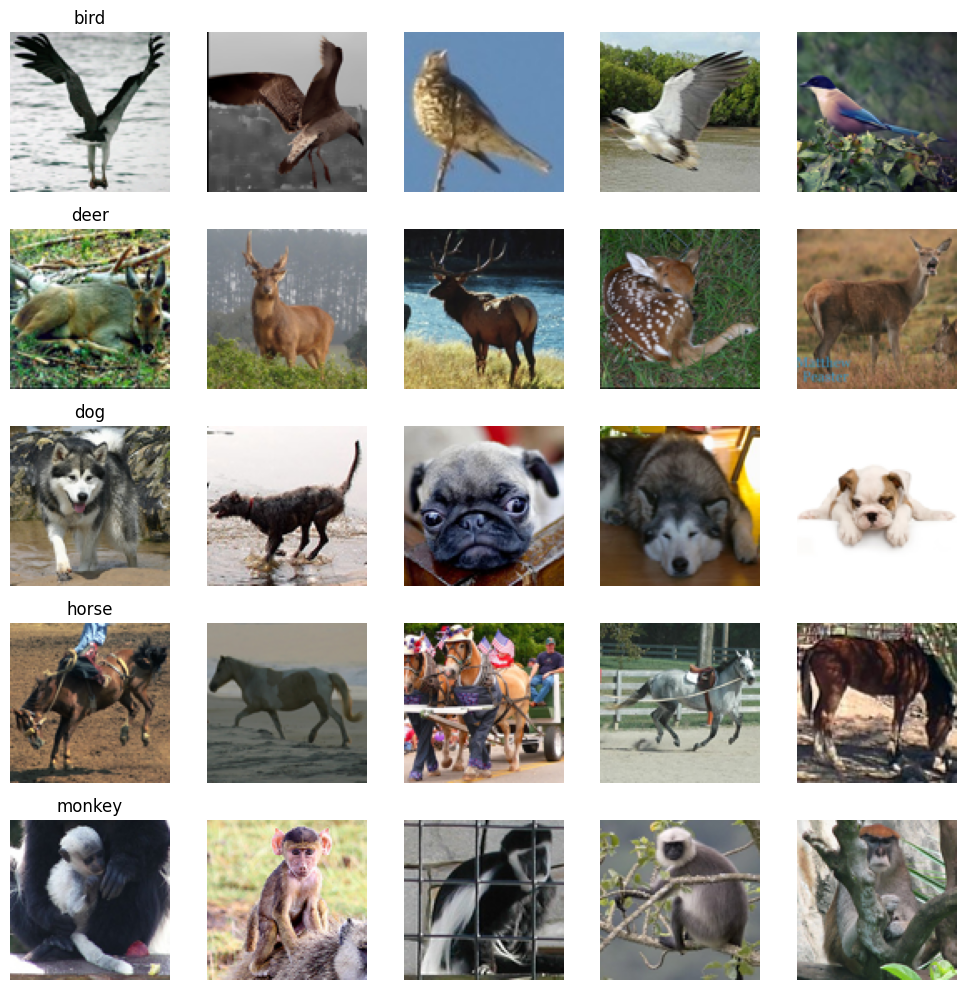

In [22]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [23]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        # YOUR CODE HERE

        self.root = root
        self.train = train
        self.transform = transform

        split = "train" if train else "test"
        self.dataset = datasets.STL10(root=root, split=split, download=download, transform=None)

        wanted_classes = set(class_mapping.keys())
        self.indices = [i for i, label in enumerate(self.dataset.labels) if label in wanted_classes]

        self.target_transform = {orig: i for i, orig in enumerate(class_mapping.keys())}
        self.class_mapping = class_mapping

    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        # YOUR CODE HERE

        return len(self.indices)


    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        # YOUR CODE HERE

        real_idx = self.indices[idx]
        img, label = self.dataset[real_idx]

        label = self.target_transform[label]

        if self.transform:
            img = self.transform(img)

        return img, label

In [25]:
def create_stl10_transforms():
    mean = (0.4467, 0.4398, 0.4066)
    std  = (0.2603, 0.2566, 0.2713)

    train_tf = transforms.Compose([
        transforms.RandomResizedCrop(96),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

    test_tf = transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(96),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    return train_tf, test_tf

train_tf, test_tf = create_stl10_transforms()

train_stl = STL10_loader("./data", train=True,  transform=train_tf,  download=True)
test_stl  = STL10_loader("./data", train=False, transform=test_tf, download=True)

train_stl_loader = DataLoader(train_stl, batch_size=64, shuffle=True, num_workers=2)
test_stl_loader  = DataLoader(test_stl, batch_size=64, shuffle=False, num_workers=2)

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

try:
    model = ConvNetDeep(num_classes=5).to(device)
except:
    model = ConvNet(num_classes=5).to(device)

ckpt_candidates = [
    "/root/cv1/outputs/best_model.pt",
    "/root/cv1/outputs/last_model.pt",
]
for p in ckpt_candidates:
    if os.path.exists(p):
        print(f"Loading checkpoint: {p}")
        state = torch.load(p, map_location=device)
        if isinstance(state, dict) and "state_dict" in state:
            state = state["state_dict"]
        model.load_state_dict(state, strict=False)
        break

last = None
for name, layer in model.named_modules():
    if isinstance(layer, nn.Linear):
        last = (name, layer)
last_name, last_layer = last
in_features = last_layer.in_features
new_fc = nn.Linear(in_features, 5)

parent = model
for part in last_name.split('.')[:-1]:
    parent = getattr(parent, part)
setattr(parent, last_name.split('.')[-1], new_fc)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

base_params, head_params = [], []
for n, p in model.named_parameters():
    if last_name in n:
        head_params.append(p)
    else:
        base_params.append(p)

optimizer = optim.Adam(
    [
        {"params": base_params, "lr": 1e-4},
        {"params": head_params,  "lr": 5e-4},
    ],
    weight_decay=1e-4,
)


In [31]:
def evaluate(loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            pred = model(x).argmax(1)
            correct += (pred == y).sum().item()
            total   += y.size(0)
    return 100.0 * correct / max(1, total)

def train_one_epoch(loader):
    model.train()
    total_loss, seen = 0.0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad(set_to_none=True)
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
        seen += x.size(0)
    return total_loss / max(1, seen)

EPOCHS = 150
best = 0.0
os.makedirs("/root/cv1/outputs", exist_ok=True)
best_path = "/root/cv1/outputs/best_stl10.pt"

for ep in range(1, EPOCHS+1):
    loss = train_one_epoch(train_stl_loader)
    val_acc = evaluate(test_stl_loader)
    print(f"[{ep:02d}] loss {loss:.4f}   eval_acc {val_acc:.2f}%")
    if val_acc > best:
        best = val_acc
        torch.save({"state_dict": model.state_dict()}, best_path)
        print(" Saved best")

print(f"Best Eval Accuracy: {best:.2f}%")

model.load_state_dict(torch.load(best_path)["state_dict"])
test_acc = evaluate(test_stl_loader)
print(f"Test Accuracy: {test_acc:.2f}%")

def per_class_accuracy(loader):
    names = [class_mapping[k] for k in sorted(class_mapping.keys())]
    c = [0]*len(names); t = [0]*len(names)
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            pred = model(x).argmax(1)
            for k in range(len(names)):
                mask = (y == k)
                t[k] += mask.sum().item()
                c[k] += (pred[mask] == y[mask]).sum().item()
    for k, nm in enumerate(names):
        acc = 100.0 * c[k] / max(1, t[k])
        print(f"{nm:>7s}: {acc:5.2f}%")

per_class_accuracy(test_stl_loader)

[01] loss 1.5341   eval_acc 34.52%
 Saved best
[02] loss 1.4871   eval_acc 34.35%
[03] loss 1.4734   eval_acc 41.52%
 Saved best
[04] loss 1.4461   eval_acc 39.27%
[05] loss 1.4412   eval_acc 40.85%
[06] loss 1.4313   eval_acc 41.60%
 Saved best
[07] loss 1.4283   eval_acc 43.42%
 Saved best
[08] loss 1.4065   eval_acc 42.27%
[09] loss 1.4098   eval_acc 43.08%
[10] loss 1.4016   eval_acc 42.38%
[11] loss 1.3792   eval_acc 43.55%
 Saved best
[12] loss 1.3711   eval_acc 44.73%
 Saved best
[13] loss 1.3651   eval_acc 44.48%
[14] loss 1.3693   eval_acc 44.50%
[15] loss 1.3660   eval_acc 43.08%
[16] loss 1.3496   eval_acc 44.65%
[17] loss 1.3371   eval_acc 47.65%
 Saved best
[18] loss 1.3465   eval_acc 48.45%
 Saved best
[19] loss 1.3185   eval_acc 50.08%
 Saved best
[20] loss 1.3138   eval_acc 46.12%
[21] loss 1.3124   eval_acc 45.10%
[22] loss 1.3074   eval_acc 47.15%
[23] loss 1.2981   eval_acc 48.10%
[24] loss 1.3084   eval_acc 49.42%
[25] loss 1.2796   eval_acc 47.77%
[26] loss 1.2943 

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [ ]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
| Finley  | 33 % | 33 % | 34 % |
| Hana | 33 % | 34 % | 33 % |
| Cynthia | 34 % | 33 % | 33 % |


### - End of Notebook -